In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.metrics.intrinsic_dimension import IntrinsicDimension
from src.metrics.clustering import LabelClustering
from src.utils.tensor_storage import retrieve_from_storage, preprocess_label
from src.metrics.probe import LinearProbe
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
from src.utils.tensor_storage import preprocess_label
import datasets
plot_config = {
    #'font.size': 12,           
    'axes.titlesize': 30,      
    'axes.labelsize': 29,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 23,
    'figure.figsize': (10,8),
    'lines.linewidth': 2.5,
    'lines.markersize': 10,
}


/u/dssc/zenocosini/helm_suite/representation_landscape_fs_ft/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def plotter(data, title, ylabel):
    # Set the style
    sns.set_style(
        "whitegrid",
        rc={"axes.edgecolor": ".15", "xtick.bottom": True, "ytick.left": True},
    )
    # Setup figure and axes for 2 plots in one row
    plt.figure(dpi = 200)
    layers = np.arange(0,data[0].shape[0]+1)

    #Set ticks
    if layers.shape[0] < 50:
        tick_positions = np.arange(0, layers.shape[0], 4)  # Generates positions 0, 4, 8, ...
    else:
        tick_positions = np.arange(0, layers.shape[0], 8)  # Generates positions 0, 4, 8, ...

    tick_labels = tick_positions +1 # Get the corresponding labels from x

    
    names = ["0 shot pt", 
            "1 shot pt", 
            "2 shot pt",
            "5 shot pt",
            "0 shot ft"]
            #"0 shot ft"]
    markerstyle = ['o', 'o', 'o', 'o', 'x']
    
    for int_dim, label, markerstyle in zip(data, names, markerstyle):
        sns.scatterplot(x=layers, y=int_dim, marker= markerstyle)
        sns.lineplot(x=layers, y=int_dim, label=label)


    plt.xlabel("Layer")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(ticks=tick_positions, labels=tick_labels)
    #tick_positions_y = np.arange(0, 0.7, 0.7/10).round(3)
    #plt.yticks(tick_positions_y)
    plt.tick_params(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.rcParams.update(plot_config)
    plt.show()

## Dataset

In [19]:
train_path = Path("/u/dssc/zenocosini/helm_suite/generation/representation_landscape_fs_ft/.dataset/ScienceQA/category_partition/train")
# test_path = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens/repo/diego/science_qa/category_partition/test")
#train_path = Path("/u/dssc/zenocosini/helm_suite/generation/representation_landscape_fs_ft/.dataset/ScienceQA/category_partition/train")
test_path = Path("/u/dssc/zenocosini/helm_suite/generation/representation_landscape_fs_ft/.dataset/ScienceQA/category_partition/test")
train = datasets.load_from_disk(train_path).to_pandas()
test = datasets.load_from_disk(test_path).to_pandas()

In [27]:
# category_to_exclude = [
#     "Phrases and clauses"
#     "Verb tense",
#     "Developing and supporting arguments",
#     "Formatting"
#     "Sentences, fragments, and run-ons",
#     "Literary devices",
#     "Creative techniques",
#     "Supply and demand",
#     "Rhyming",
#     "Short and long vowels",
#     "Poetry elements",
#     "Historical figures",
#     "Pronouns and antecedents",
#     "Cells",
#     "Author's purpose and tone",
#     "Thermal energy",
#     "States of matter",
#     "Earth events",
#     "Kinetic and potential energy",
#     "Social studies skills",
#     "Economics",
#     "Editing and revising",
#     "Categories",
#     "Government",
#     "Shades of meaning",
#     "Animals",
#     "Comprehension strategies",
#     "Research skills",
#     "Plants",
#     "Opinion writing",
#     "Mixtures"]
category_to_include = [
    "Physical and chemical change",
    "Literary devices",
    "Chemical reactions",
    "Heat and thermal energy",
    "Basic economic principles",
    "Weather and climate",
    "Atoms and molecules",
    "Rocks and minerals"]
category_to_include = [

        "Literary devices",
        "Units and measurement",
        "Genes to traits",                 
        "Reference skills",                       
        "Sentences, fragments, and run-ons",   
        "Developing and supporting arguments",
        "Classification",   
        "Traits and heredity",                    
        "Formatting",                   
        "Physical and chemical change",
        "Designing experiments",          
        "Heat and thermal energy",
]
rows_to_keep = test.query(f"category in {category_to_include}").index.to_numpy()

In [15]:
# test.query(f"category=='Force and motion'")
# test.query(f"category in {category_to_include}")
topics = test.topic.to_list()
categories = test.category.to_list()
subjects = test.subject.to_list()

In [ ]:
["Genes to traits",
 "Physical and chemical change",
 "Chemical reactions", 
 "Basic economic principles",
 "Literary devices"
 ]

In [26]:
test.category.value_counts()

category
Literary devices                       515
Units and measurement                  369
Genes to traits                        314
Reference skills                       272
Sentences, fragments, and run-ons      262
Developing and supporting arguments    176
Classification                         169
Traits and heredity                    152
Formatting                             149
Physical and chemical change           119
Designing experiments                  112
Heat and thermal energy                100
Force and motion                        88
Verb tense                              82
Basic economic principles               82
Word usage and nuance                   79
Chemical reactions                      76
Weather and climate                     72
Pronouns                                70
Heredity                                68
Materials                               50
Phrases and clauses                     43
Velocity, acceleration, and forces      42
At

In [7]:
print(test.topic.value_counts())
topic_to_include = [
    "biology",
    "physics",
    "chemistry",
    # "grammar",
    "economics",
    # "earth science",
]

rows_to_keep = test.query(f"topic in {topic_to_include}").index.to_numpy()

topic
biology                              744
writing-strategies                   558
figurative-language                  515
units-and-measurement                379
physics                              365
reference-skills                     272
chemistry                            237
punctuation                          188
grammar                              129
economics                            128
science-and-engineering-practices    112
earth-science                        111
verbs                                 82
capitalization                        55
phonological-awareness                39
vocabulary                            25
civics                                14
pronouns                               2
Name: count, dtype: int64


In [9]:
with open("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens/repo/results/scienceqa/few_shot_category/evaluated_test/llama-3-8b/5shot/statistics_target.pkl", "rb") as f:
    statistics = pickle.load(f)

## Clustering

100%|██████████| 32/32 [00:45<00:00,  1.44s/it]


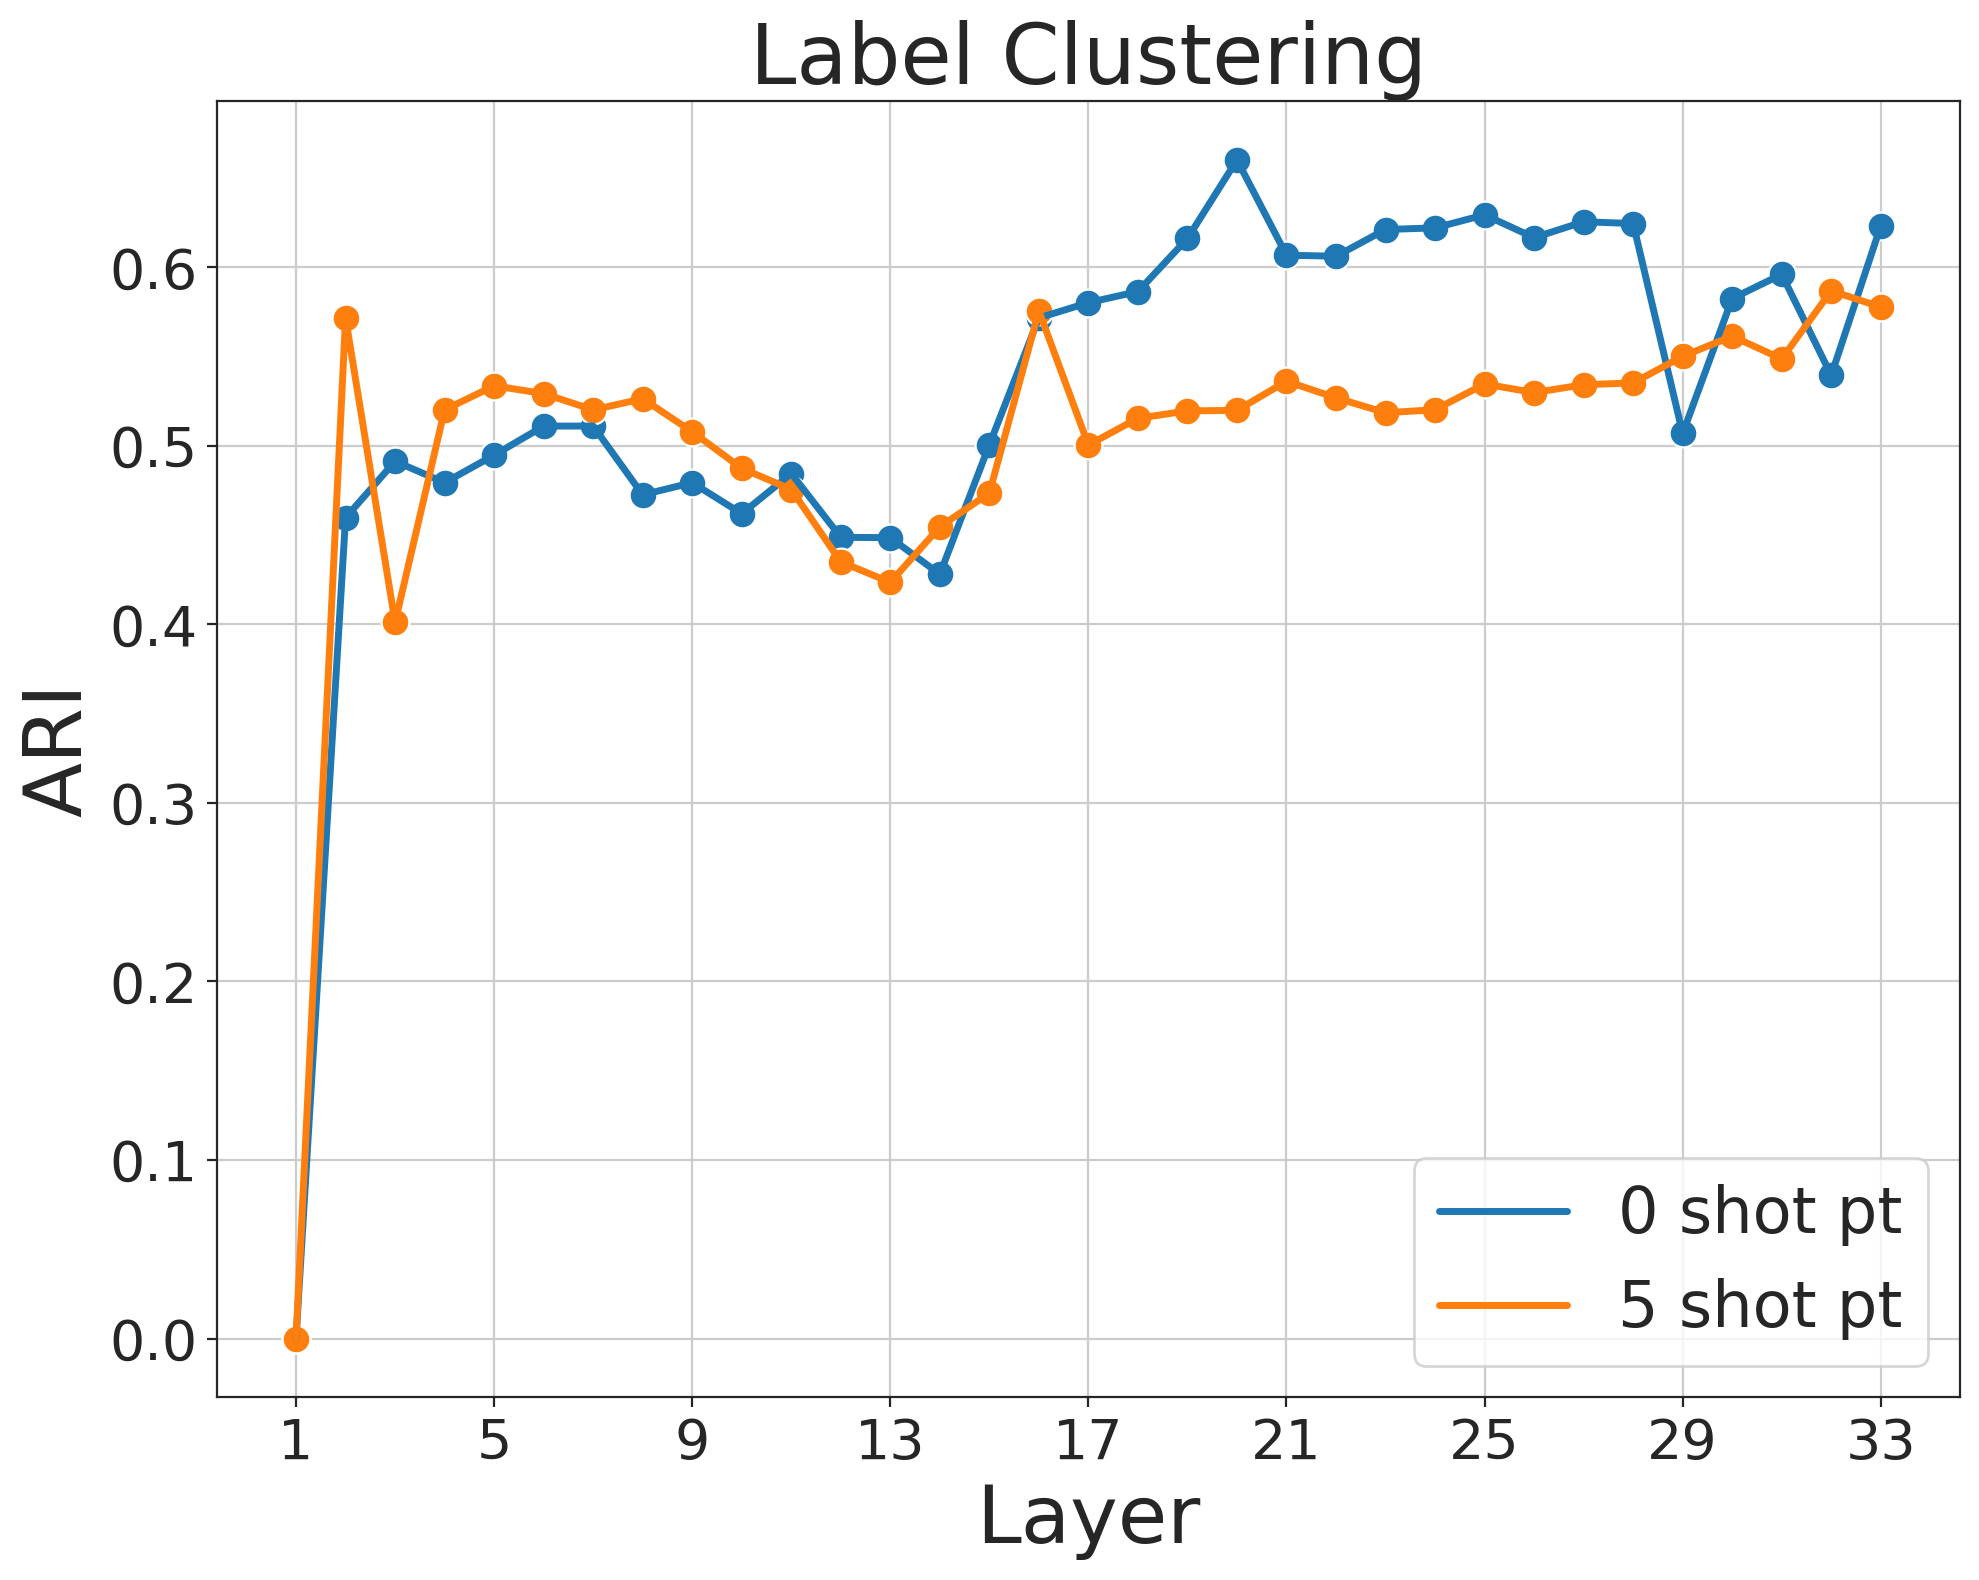

In [29]:
_PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
             "/repo/results/scienceqa/few_shot_category/evaluated_test/llama-3-8b")
_PATH = Path("/orfeo/scratch/dssc/zenocosini/scienceqa/result/scienceqa/"
             "few_shot_category/evaluated_test/meta-llama-3-8b/")
shot = [0, 5]
data_subjects = []
# labels = preprocess_label(topics, 32)
#labels = preprocess_label(topics, 32)

#labels = preprocess_label(subjects, 32)
labels = preprocess_label(categories, 32)

#labels = labels[:, rows_to_keep]
#labels = preprocess_label(statistics["subjects"], 32)
labels = labels[:, rows_to_keep]
for i in shot:
    clustering = LabelClustering()
    out_from_storage = retrieve_from_storage(_PATH / f'{i}shot',
                                            full_tensor=True)
    tensors, _, number_of_layers = out_from_storage
    tensors = tensors[:, rows_to_keep]
    
    data_subjects.append(clustering.main(z=1.68,
                                tensors=tensors,
                                labels=labels,
                                number_of_layers=number_of_layers,
                                parallel=False))
    
ari = [np.array(i['adjusted_rand_score']) for i in data_subjects]
plotter(ari, "Label Clustering", "ARI")


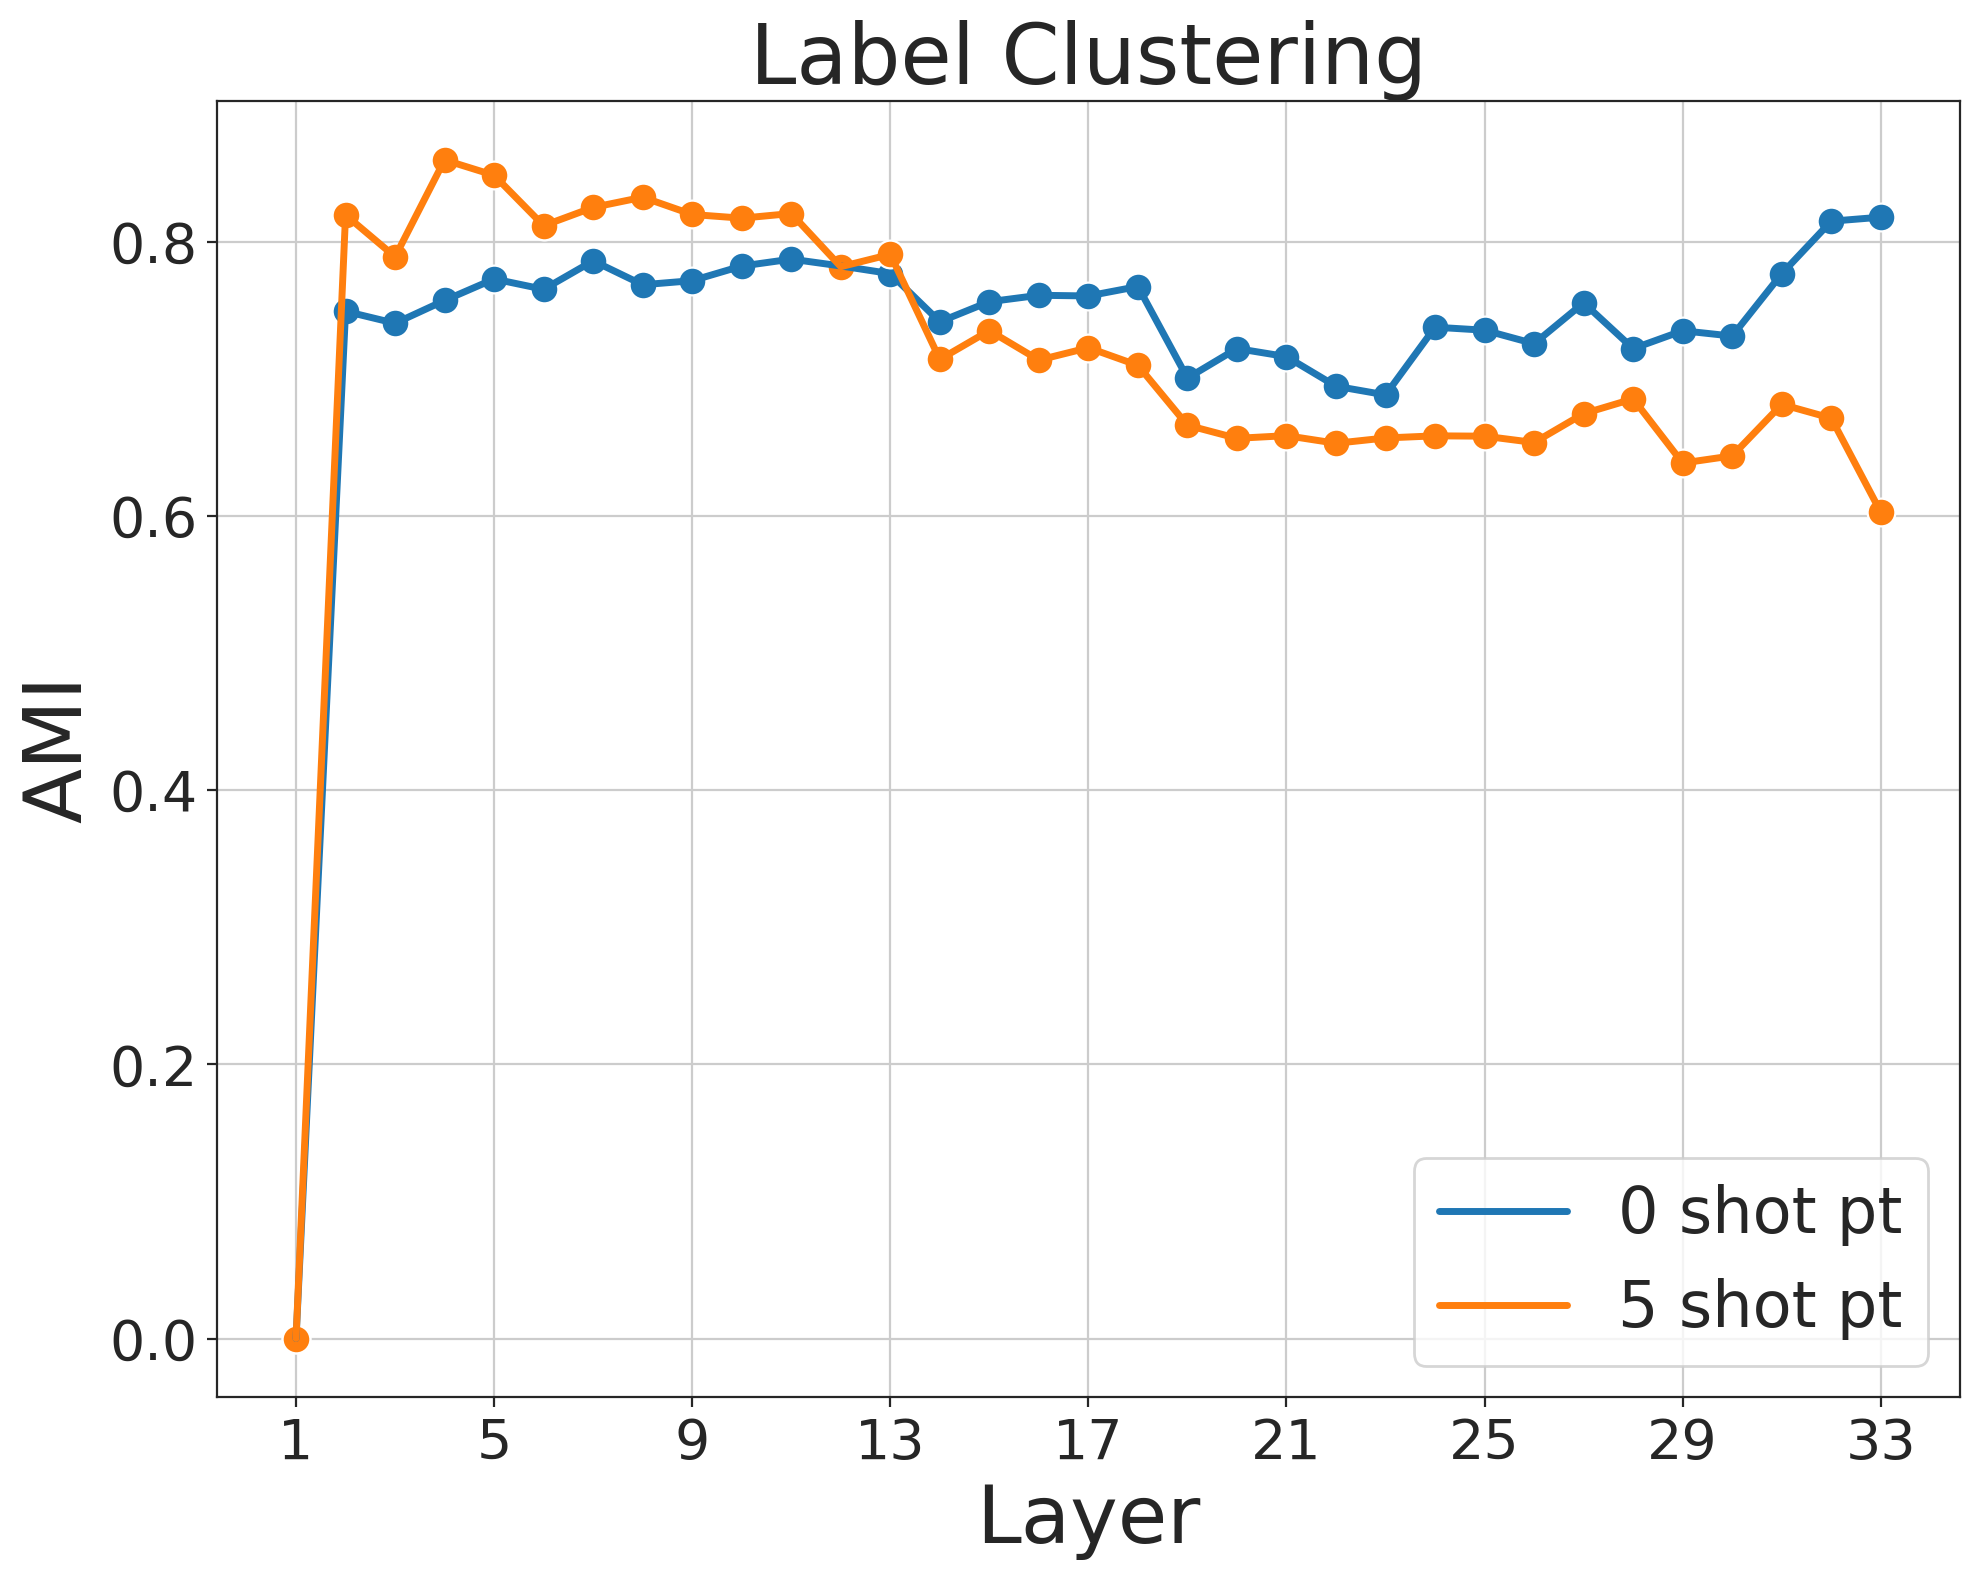

In [9]:
ari = [np.array(i['adjusted_mutual_info_score']) for i in data_subjects]
plotter(ari, "Label Clustering", "AMI")

100%|██████████| 32/32 [02:11<00:00,  4.12s/it]


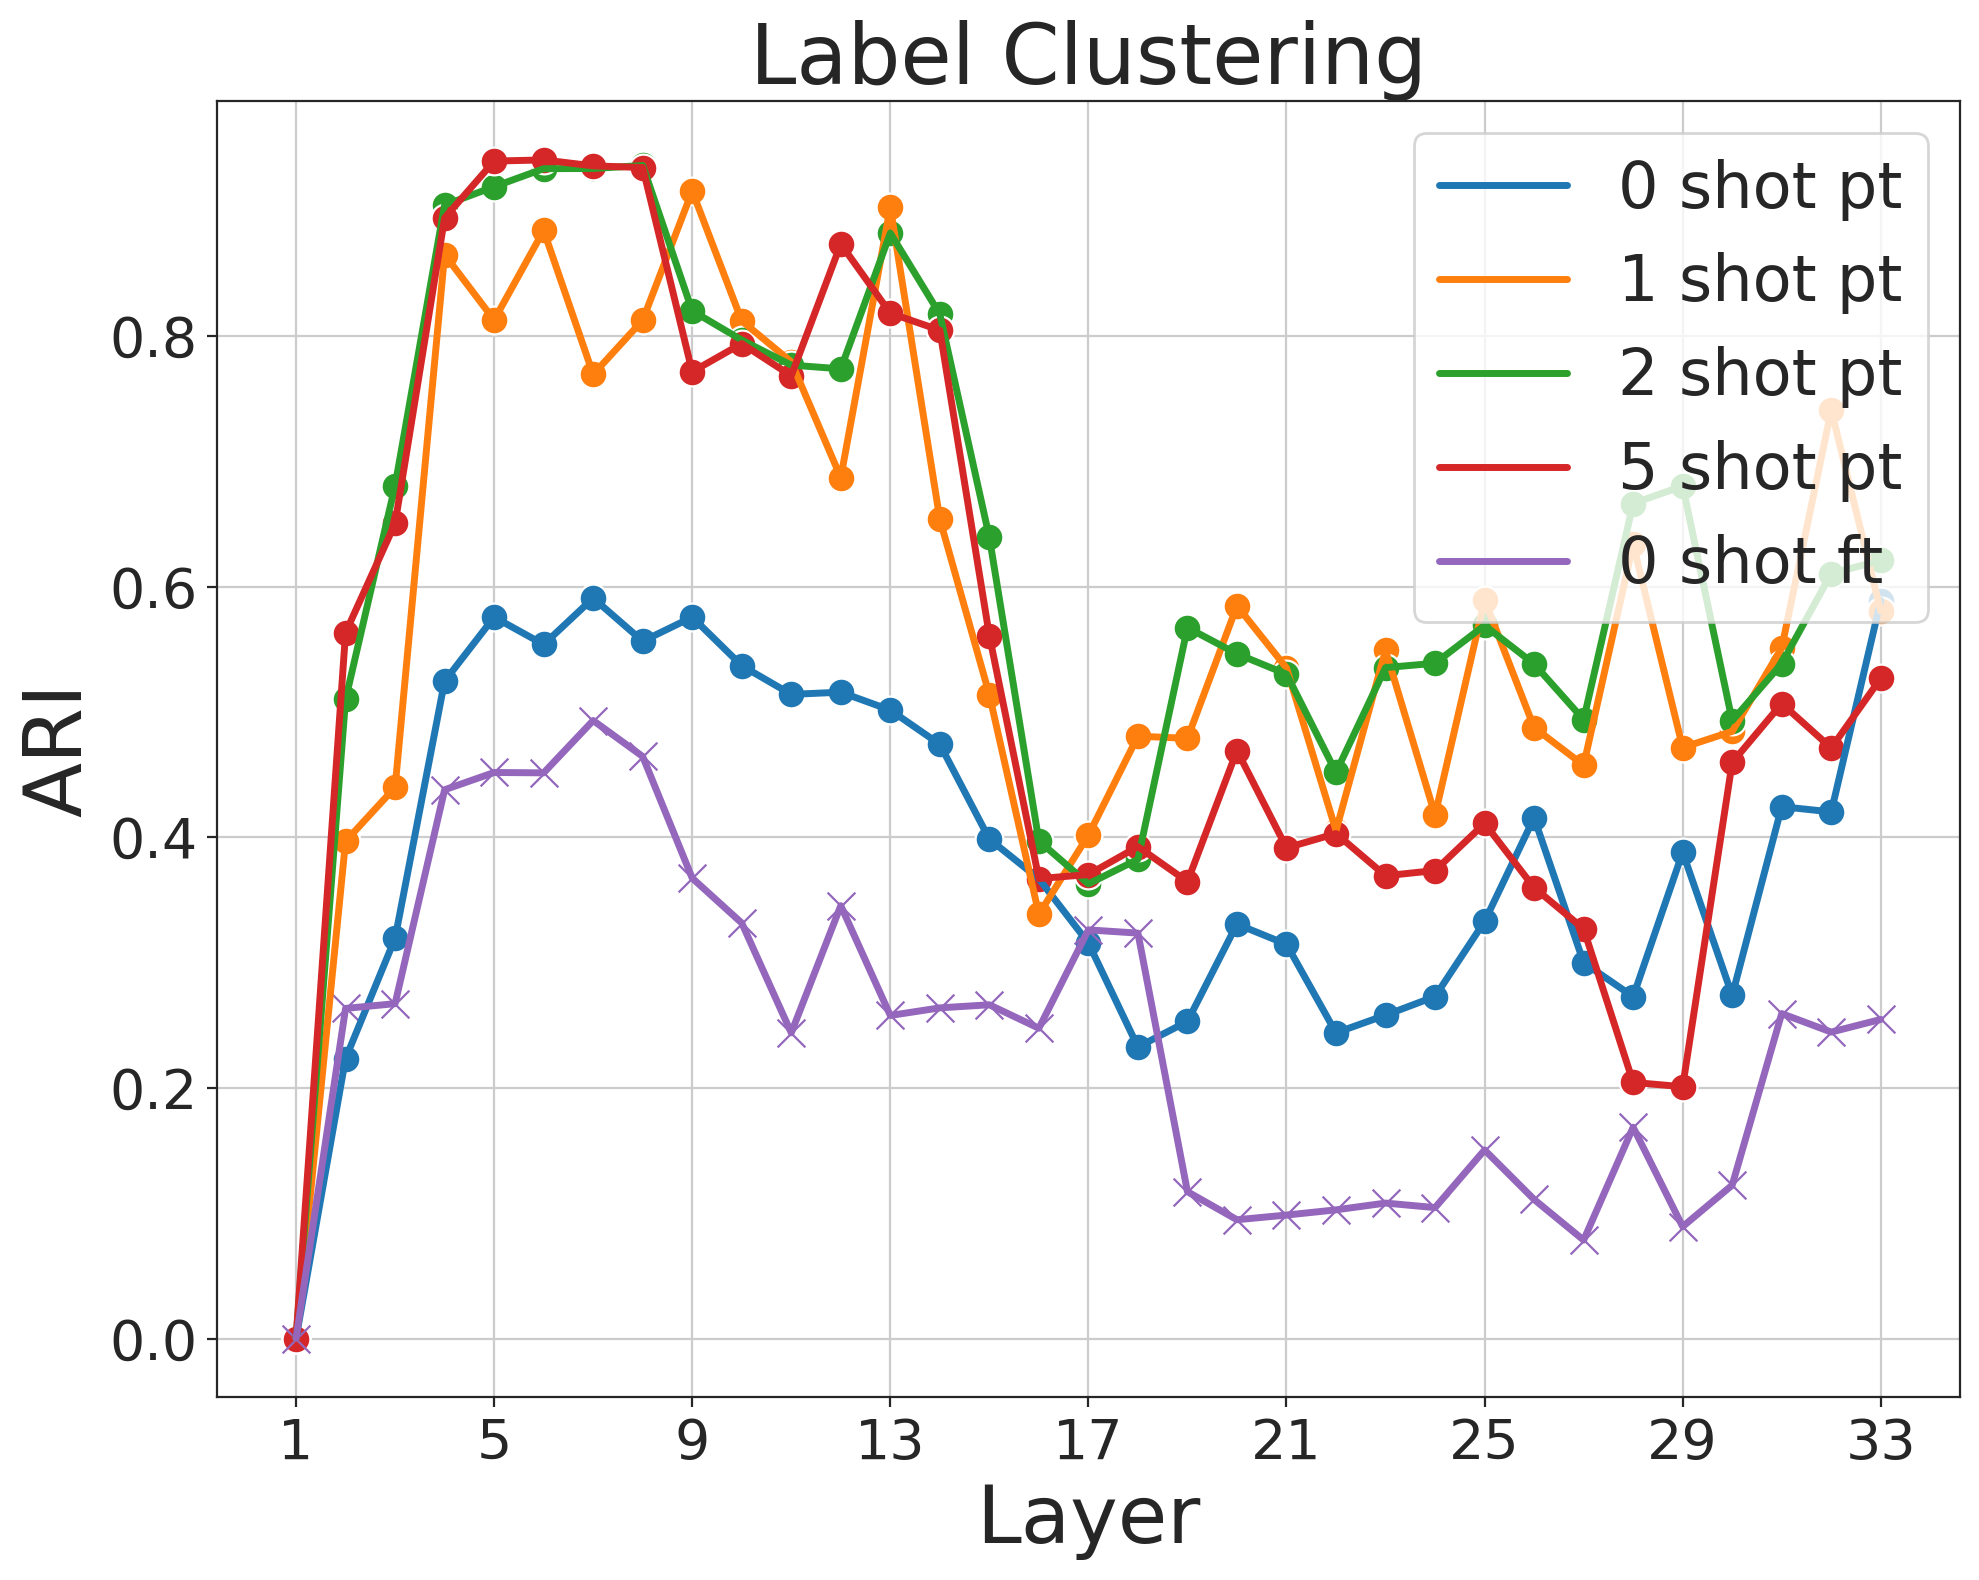

In [33]:

_PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
             "/representation_landscape_fs_ft/results/mmlu_pro_race/"
             "evaluated_test/llama-3-8b")
shot = [0,1,2,5]
data_subjects = []
for i in shot:
    clustering = LabelClustering()
    out_from_storage = retrieve_from_storage(_PATH / f'{i}shot',
                                            full_tensor=True)
    tensors, labels, number_of_layers = out_from_storage
    data_subjects.append(clustering.main(z=3,
                                tensors=tensors,
                                labels=labels["subjects"],
                                number_of_layers=number_of_layers,
                                parallel=False))
_PATH_ft = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
             "/representation_landscape_fs_ft/results/mmlu_pro_race/"
             "evaluated_test/llama-3-8b-chat")
clustering = LabelClustering()
out_from_storage = retrieve_from_storage(_PATH_ft / '0shot',
                                        full_tensor=True)
tensors, labels, number_of_layers = out_from_storage
data_subjects.append(clustering.main(z=3,
                            tensors=tensors,
                            labels=labels["subjects"],
                            number_of_layers=number_of_layers,
                            parallel=False))

ari = [np.array(i['adjusted_rand_score']) for i in data_subjects]
plotter(ari, "Label Clustering", "ARI")


  0%|          | 0/32 [00:00<?, ?it/s]

100%|██████████| 32/32 [02:12<00:00,  4.13s/it]


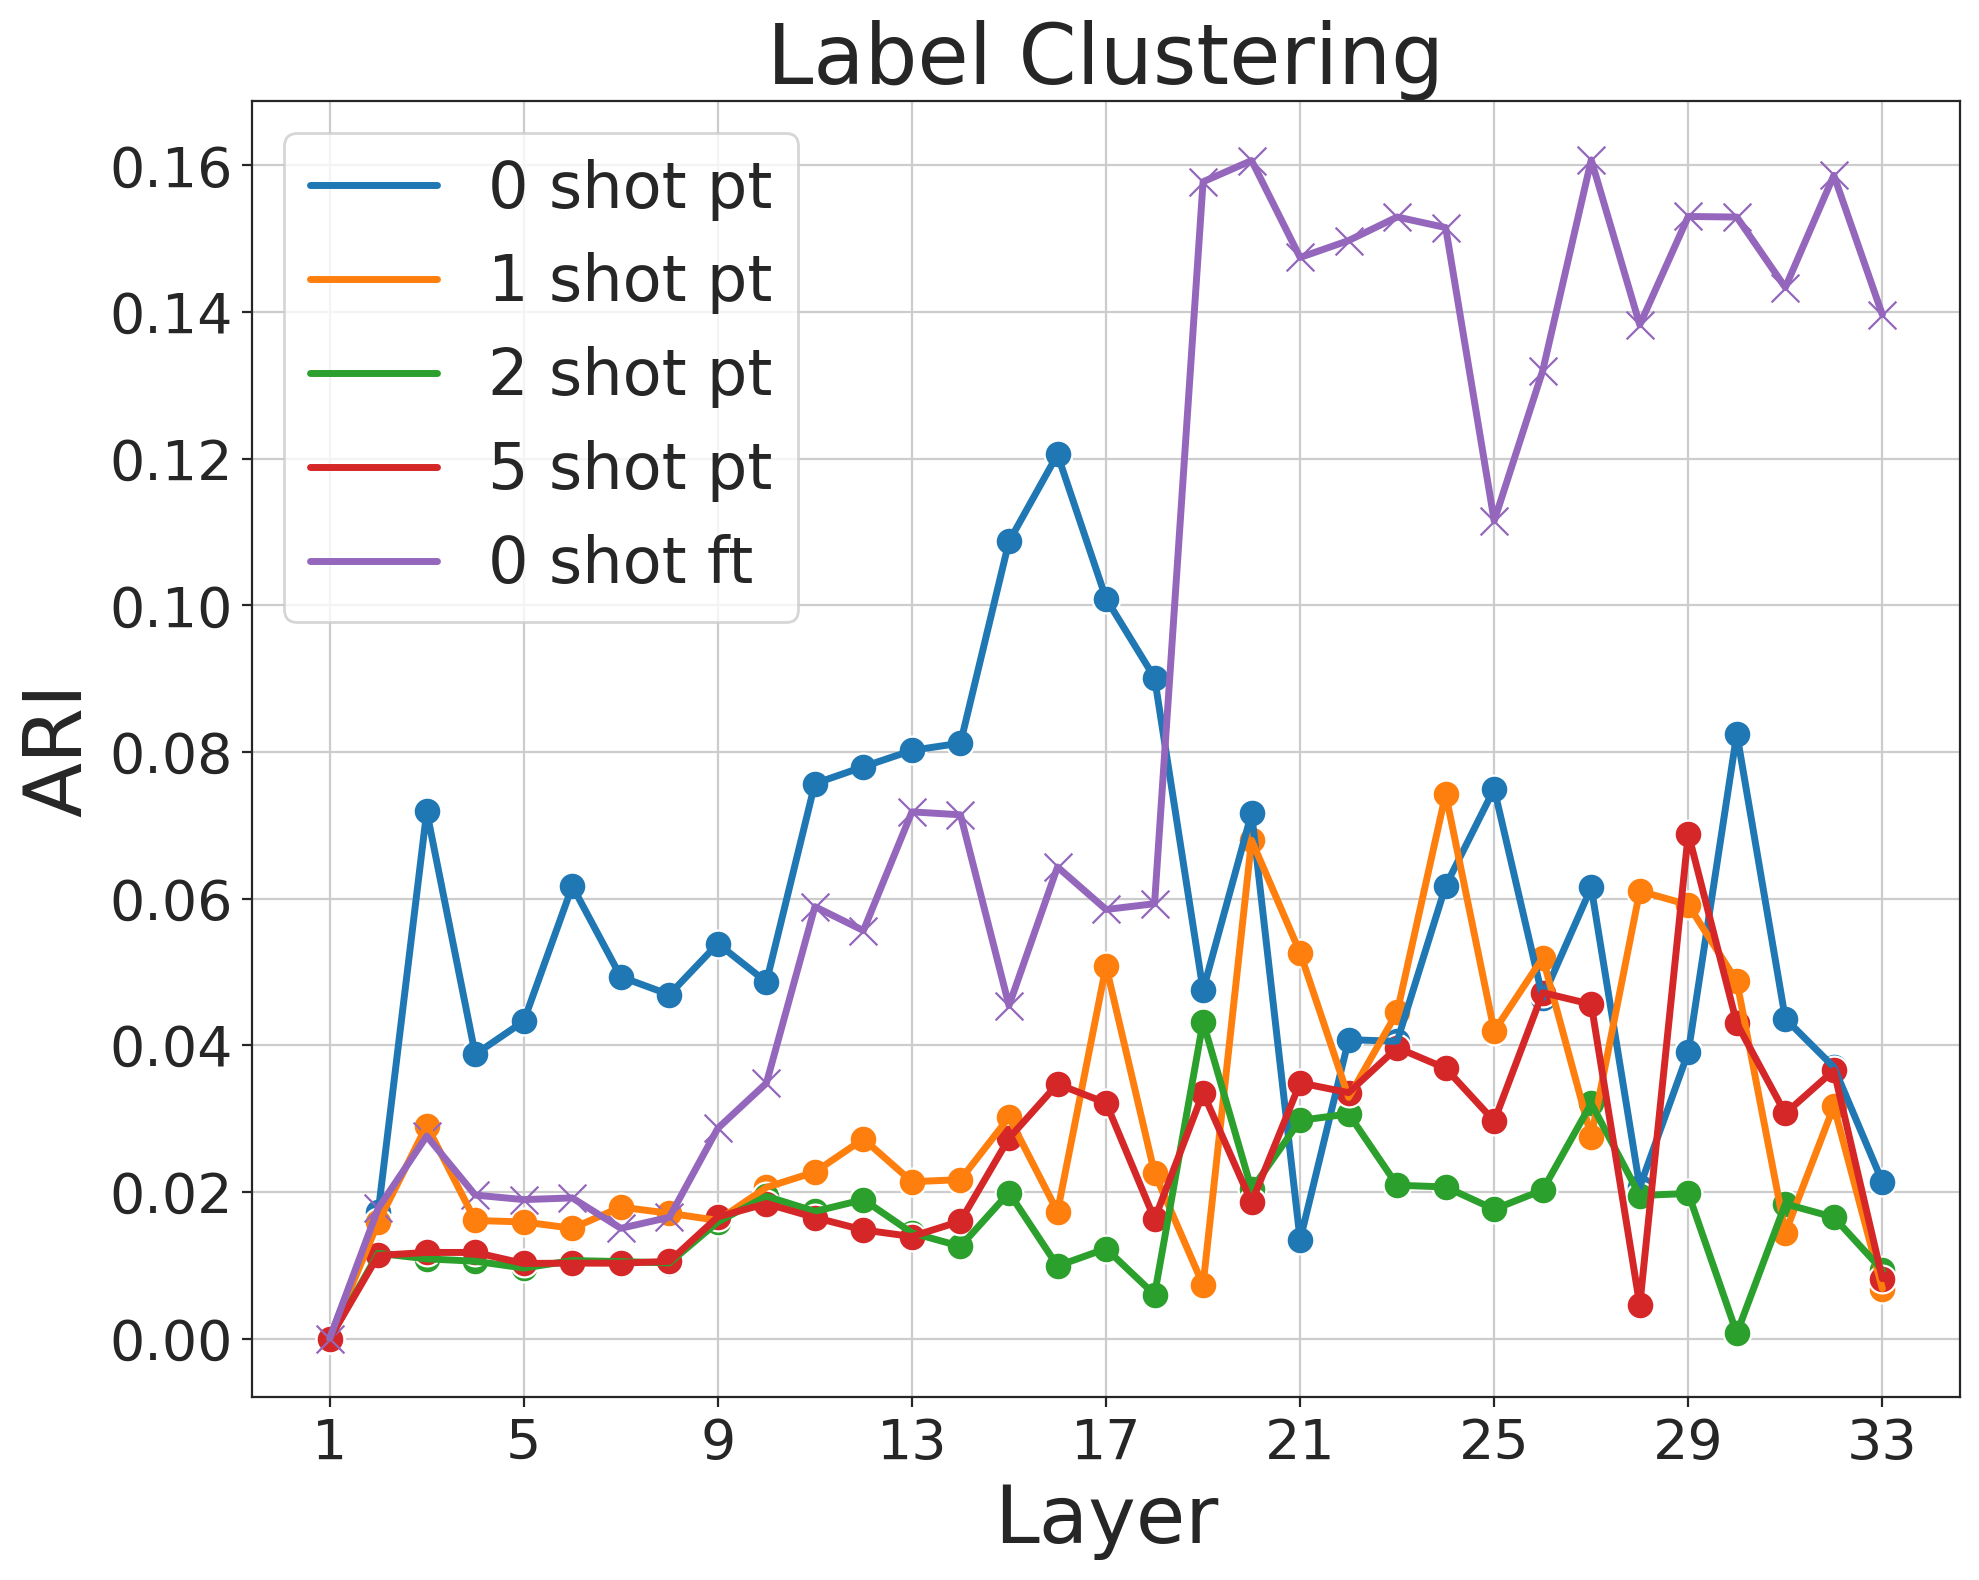

In [37]:

_PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
             "/representation_landscape_fs_ft/results/mmlu_pro_race/"
             "evaluated_test/llama-3-8b")
shot = [0,1,2,5]
data_letter = []
for i in shot:
    clustering = LabelClustering()
    out_from_storage = retrieve_from_storage(_PATH / f'{i}shot',
                                            full_tensor=True)
    tensors, labels, number_of_layers = out_from_storage
    data_letter.append(clustering.main(z=3,
                                tensors=tensors,
                                labels=labels["
                                
                                
                                
                                
                                
                                
                                predictions"],
                                number_of_layers=number_of_layers,
                                parallel=False))
_PATH_ft = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
             "/representation_landscape_fs_ft/results/mmlu_pro_race/"
             "evaluated_test/llama-3-8b-chat")
clustering = LabelClustering()
out_from_storage = retrieve_from_storage(_PATH_ft / '0shot',
                                        full_tensor=True)
tensors, labels, number_of_layers = out_from_storage
data_letter.append(clustering.main(z=3,
                            tensors=tensors,
                            labels=labels["predictions"],
                            number_of_layers=number_of_layers,
                            parallel=False))

ari = [np.array(i['adjusted_rand_score']) for i in data_letter]
plotter(ari, "Label Clustering", "ARI")


In [36]:
labels.keys()

dict_keys(['subjects', 'predictions'])

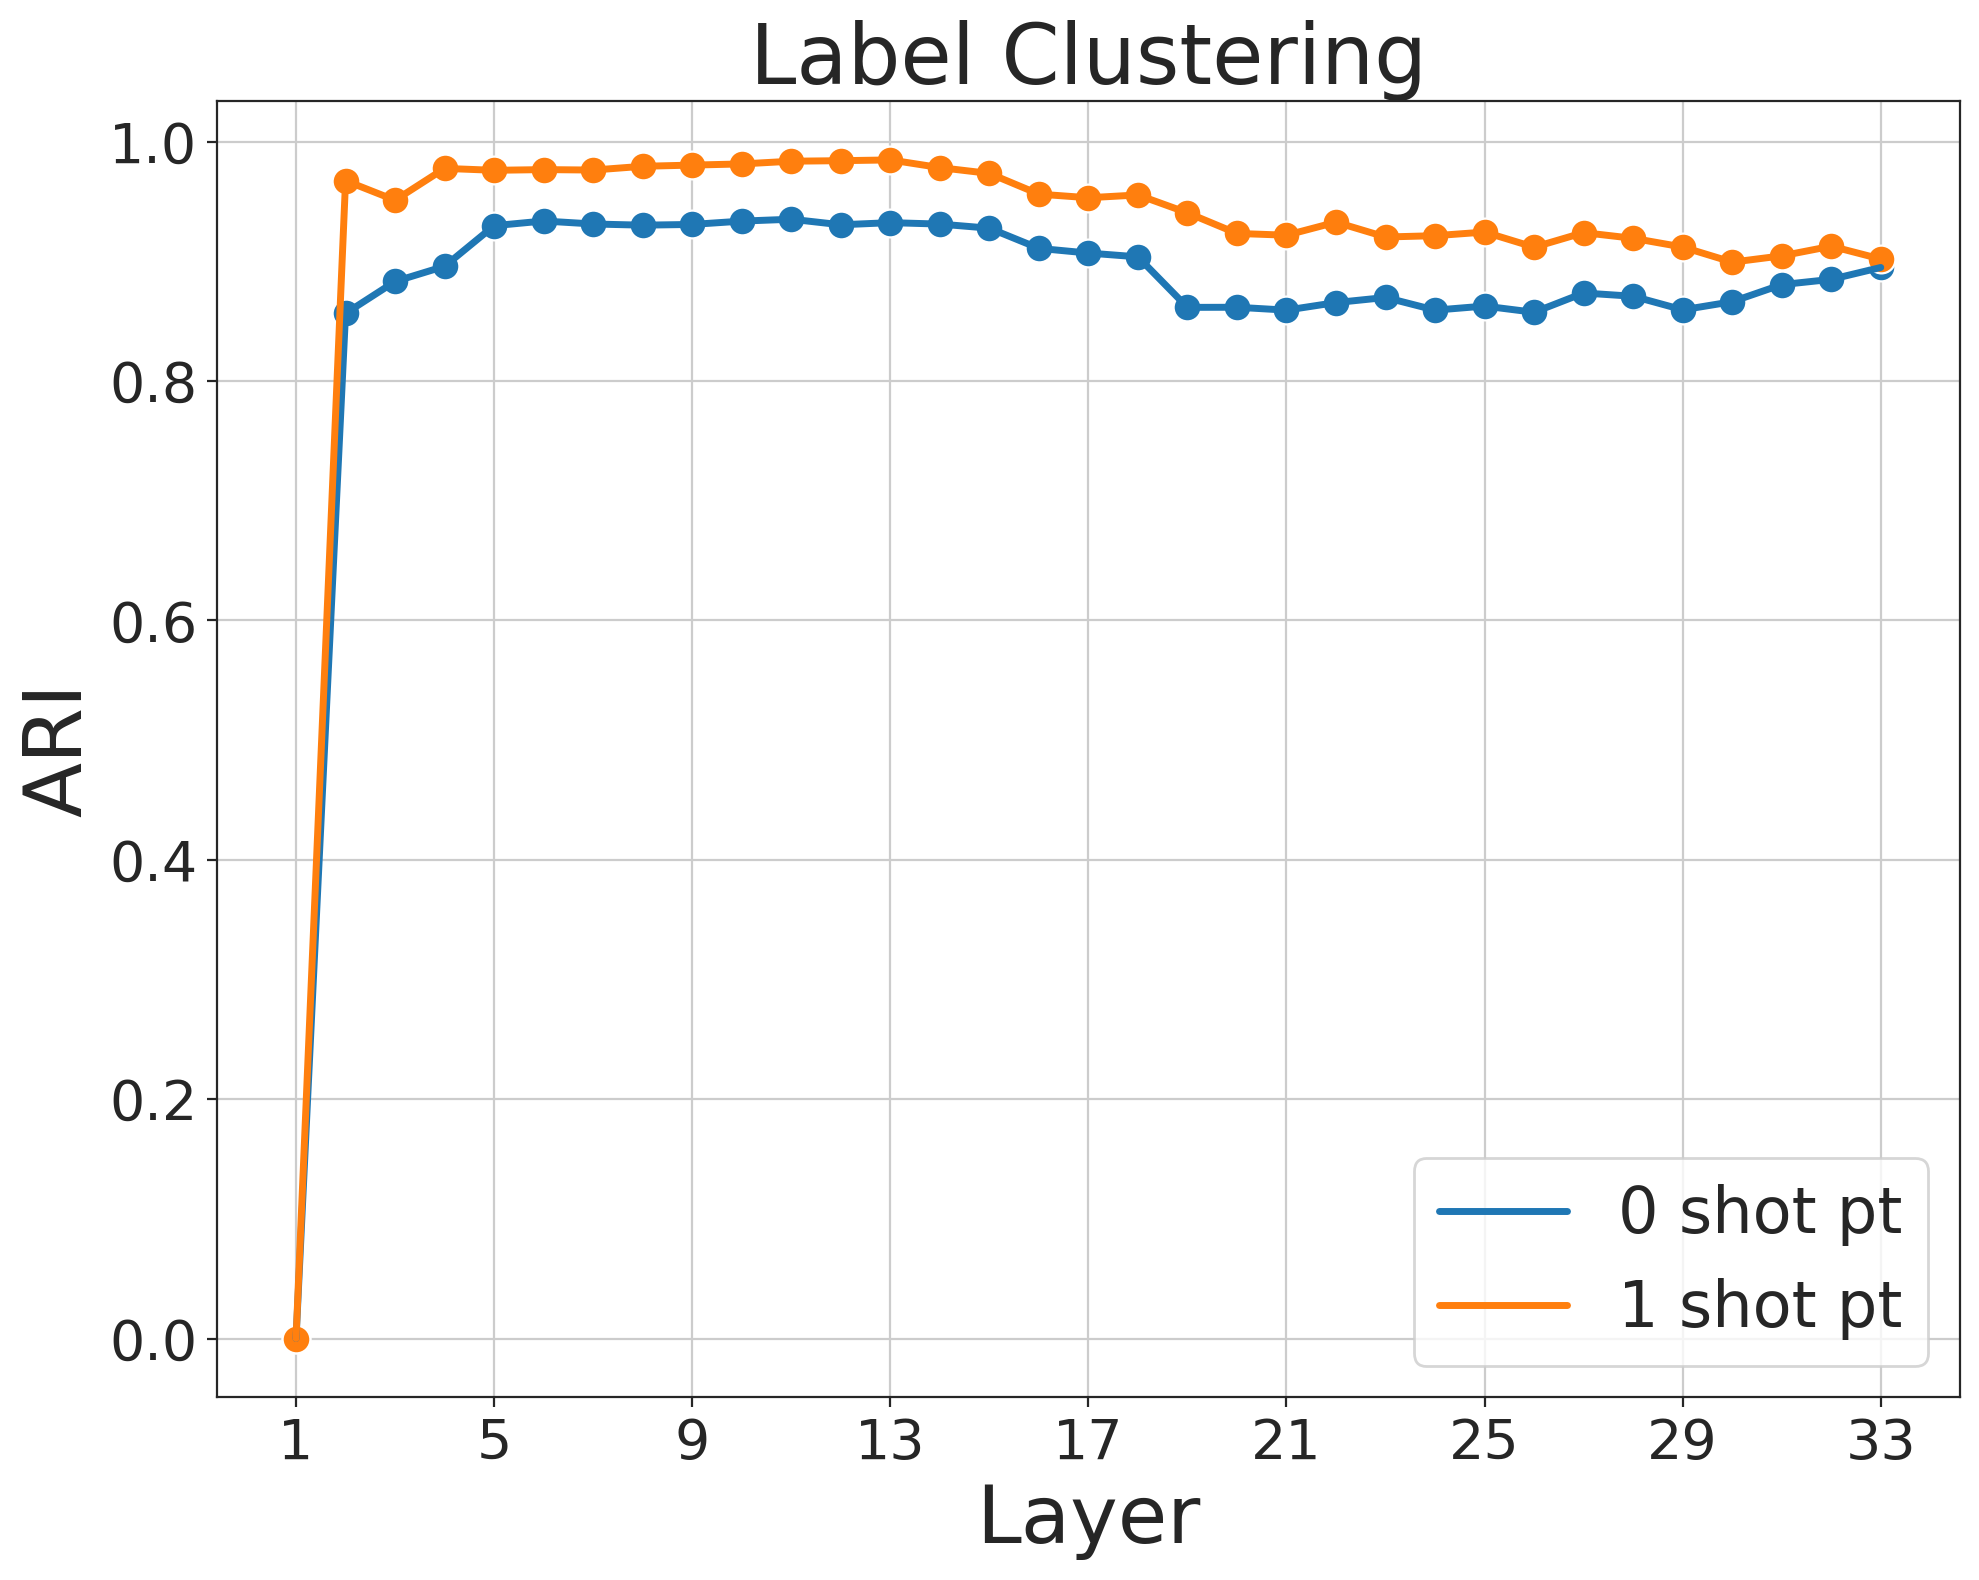

In [25]:
ari = [np.array(i['completeness_score']) for i in data_subjects]
plotter(ari, "Label Clustering", "ARI")

In [ ]:
_PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
             "/repo/results/scienceqa/evaluated_test/llama-3-8b")

shot = [0,1,2,5]
data_preds = []
for i in shot:
    clustering = LabelClustering(path= _PATH / f'{i}shot')
    data_preds.append(clustering.main(label="predictions",
                                z=1.6,
                                instance_per_sub=-1,
                                full_tensor=True))
    
ari = [np.array(i['adjusted_rand_score']) for i in data_preds]
plotter(ari, "Label Clustering", "ARI")


TypeError: LabelClustering.__init__() got an unexpected keyword argument 'path'

## Probe

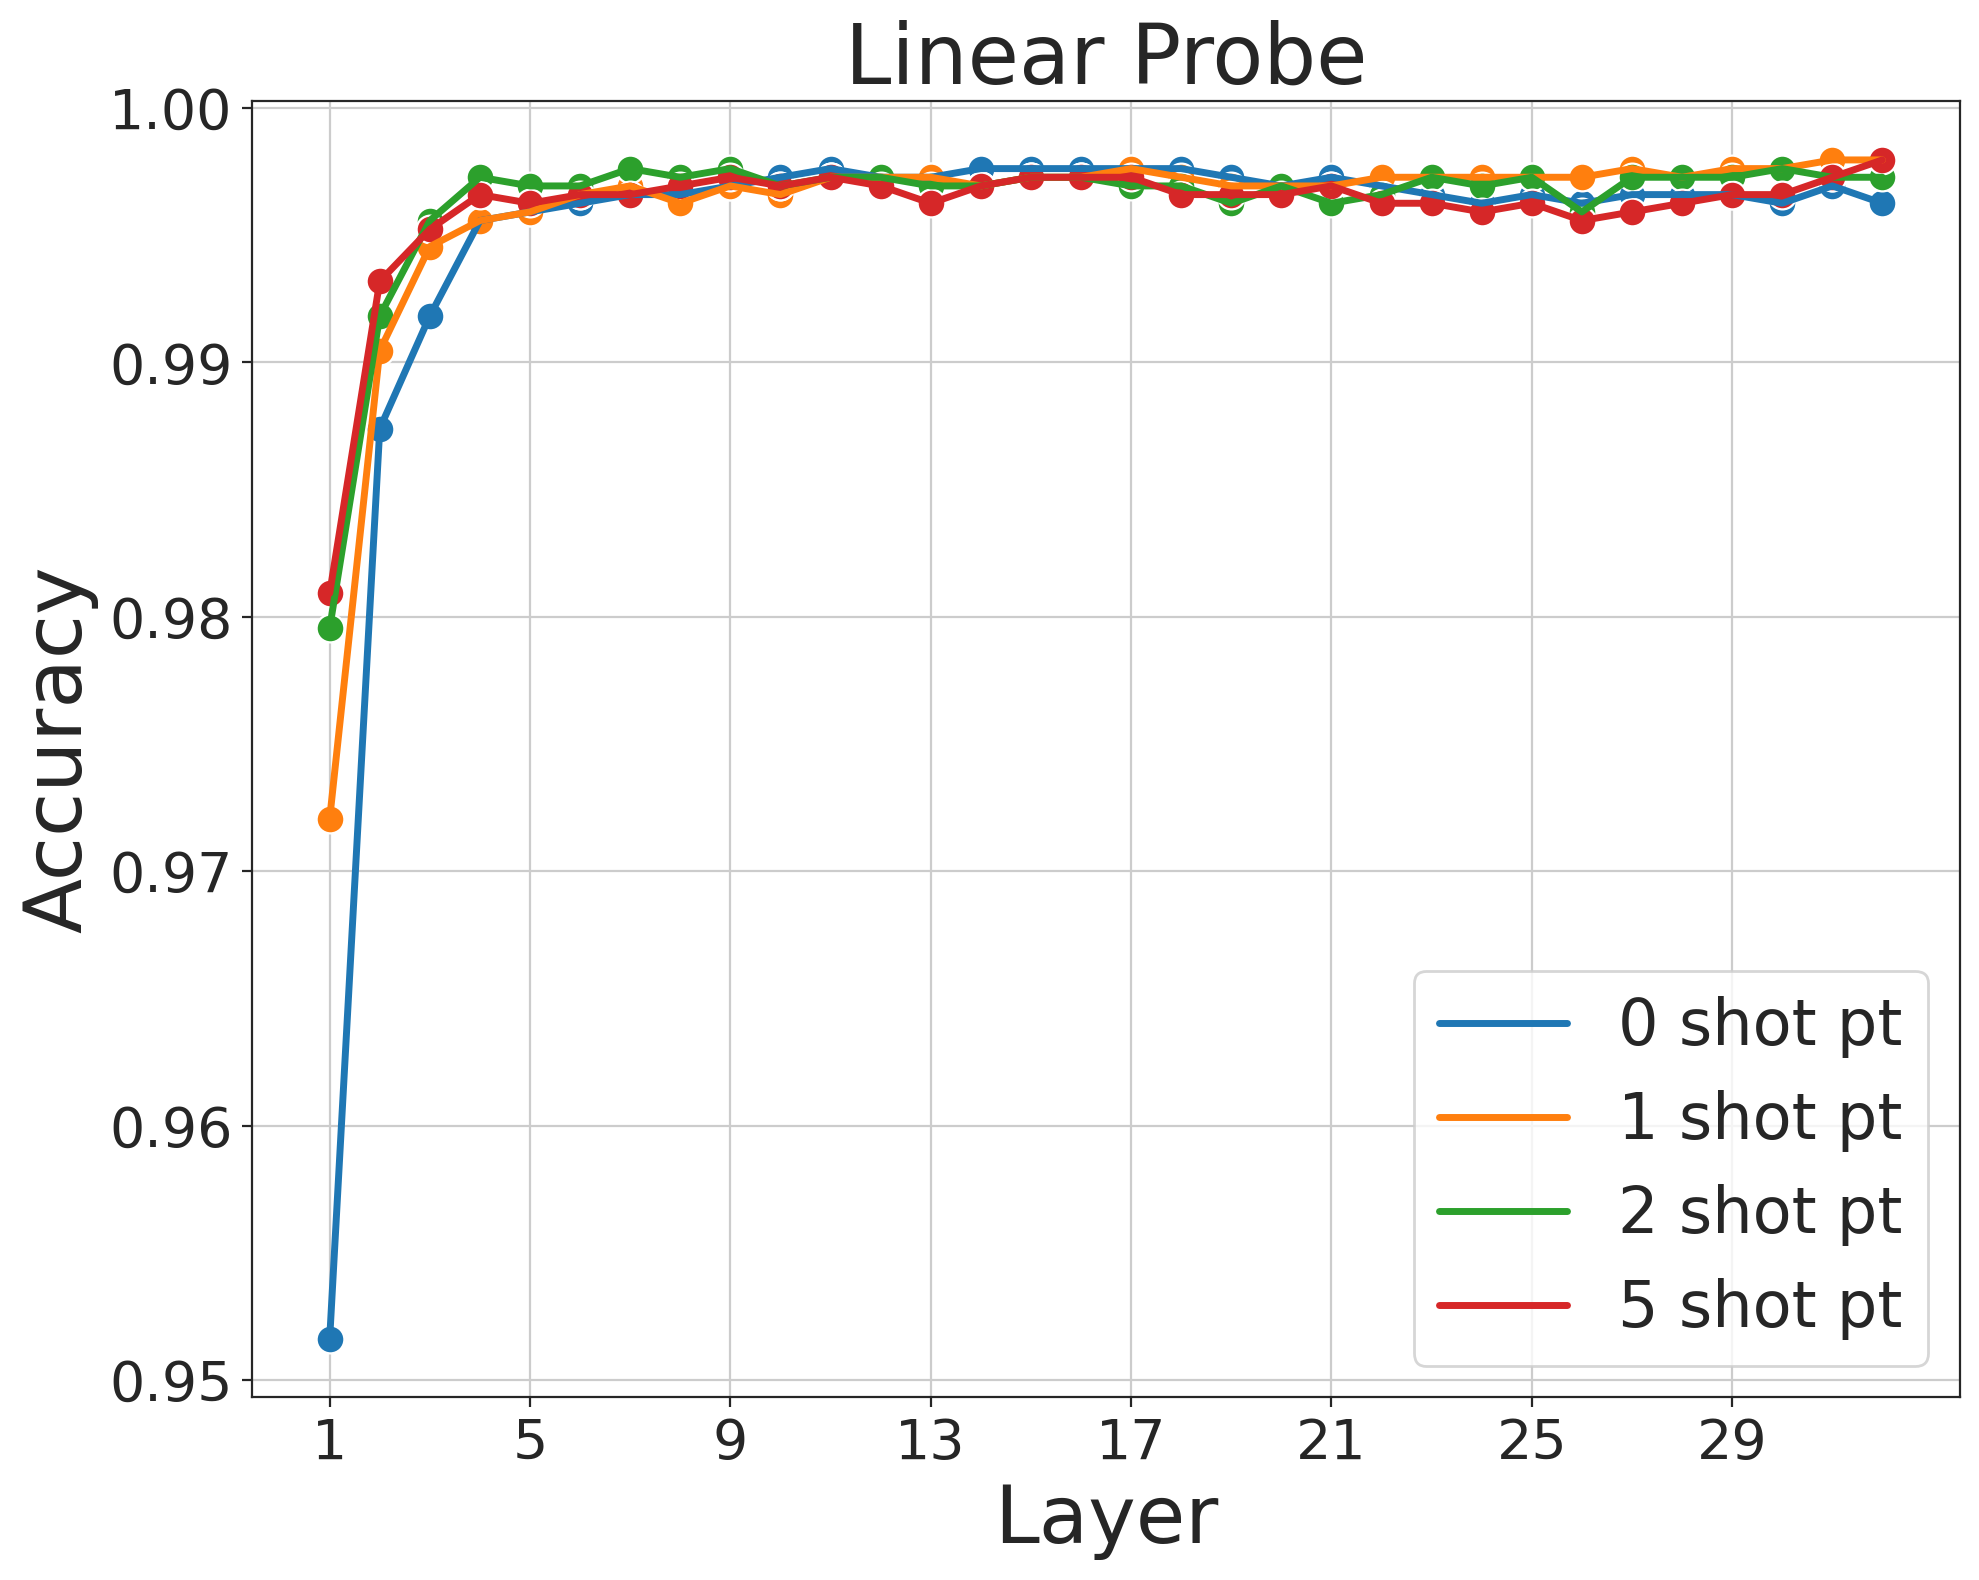

In [ ]:
# _PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
#              "/repo/results/scienceqa/few_shot_category/evaluated_test/llama-3-8b")

# shot = [0,1,2,5]
# data_preds = []
# labels = preprocess_label(topics, 32)
# for i in shot:
#     out_from_storage = retrieve_from_storage(_PATH / f'{i}shot',
#                                              full_tensor=True)
#     tensors, _, _ = out_from_storage
#     linear_probe = LinearProbe()
#     data_preds.append(linear_probe.main(
#                                 tensors=tensors,
#                                 labels=labels,
#                                 number_of_layers=tensors.shape[0],
#                                 parallel=True))
    
plotter(data_preds, "Linear Probe", "Accuracy")


# TMP


In [ ]:
with open( _PATH / "0shot/statistics_target.pkl", "rb") as f:
    stats = pickle.load(f)

In [ ]:
np.unique(stats["predictions"], return_counts=True)

(array(['A', 'B', 'C', 'D', 'acquired'], dtype='<U8'),
 array([5057, 3545,  894,  282,    8]))

In [ ]:
import torch
act = torch.load(_PATH / "0shot/l28_target.pt", weights_only=True)
act = act.to(torch.float64).numpy()
act, idx, inverse = np.unique(act, axis=0, return_index=True, return_inverse=True)
assert len(inverse)==len(idx)

/tmp/ipykernel_3413931/336141325.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  act = torch.load(_PATH / "0shot/l28_target.pt")
